In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 4)
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

## 목차
1. Read the dataset (after extracting)
2. Preprocessing
3. EDA
4. Modeling
5. Evaluation

## Read the dataset
- 데이터셋: 유저별(iduser) 문서 사용행동에 대한 횟수와 그룹 특성(group)를 처리한 데이터
    - 3개의 테이블 소스에서 Raw 데이터를 가공: ``` groupby("iduesr").agg(count,,,sum,,,etc)``` 이후에 조인함
    - 결제 타이밍 기준(유저마다 다름)으로 이전 30일의 행동 기준으로 데이터 추출
- 간혹 csv를 불러올 때 unnamed 라는 컬럼이 자동으로 생성되므로, index_col=0 이라는 명령어를 통해 처리

In [2]:
df = pd.read_csv("testset.csv", index_col=0)

In [3]:
df.head()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
1,10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
2,10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
3,10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
4,10100000624840,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
199995,10100014533282,NaN,sdu,37.0,0.0,2.0,0.0,0.0,25.0,0.0,...,0.0,0.0,14.0,37.0,7.0,0.0,1.3064e+07,1922364.0,0.0,1.4987e+07
199996,10100037382422,a2p,mdu,6.0,0.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,18.0,6.0,0.0,0.0,1.5937e+07,0.0,0.0,1.5937e+07
199997,10100024157271,NaN,sdu,32.0,0.0,0.0,0.0,0.0,28.0,0.0,...,0.0,0.0,18.0,32.0,0.0,0.0,7.3059e+06,0.0,0.0,7.3059e+06
199998,10100022150627,NaN,sdu,18.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,9.0,18.0,0.0,0.0,5.3352e+07,0.0,0.0,5.3352e+07
199999,10100021804275,NaN,sdu,3.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,3.0,3.0,0.0,0.0,9.5232e+04,0.0,0.0,9.5232e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 22 columns):
iduser           200000 non-null int64
mdutype          9328 non-null object
group            200000 non-null object
viewCount        165369 non-null float64
editCount        165369 non-null float64
shareCount       165369 non-null float64
searchCount      165369 non-null float64
coworkCount      165369 non-null float64
add              63166 non-null float64
del              63166 non-null float64
move             63166 non-null float64
rename           63166 non-null float64
adddir           63166 non-null float64
movedir          63166 non-null float64
visdays          184306 non-null float64
openCount        149090 non-null float64
saveCount        149090 non-null float64
exportCount      149090 non-null float64
viewTraffic      149090 non-null float64
editTraffic      149090 non-null float64
exportTraffic    149090 non-null float64
traffic          149090 non-null float64

In [6]:
df.shape

(200000, 22)

### Column Info.
- ✭iduser: 식별값
- mdutype: 중요x
- ✭✭group: y, 결제(mdu) vs 비결제(sdu) 정보
- ✭viewCount: 보기 횟수
- ✭editCount: 편집 횟수
- ✭shareCount: 공유 횟수
- ✭searchCount: 검색 횟수
- ✭coworkCount: 공동작업 횟수
- add: 파일 추가 횟수
- del: 파일 삭제 횟수
- move: 파일 이동 횟수
- rename: 파일명 변경 횟수
- adddir: 폴더 생성
- movedir: 폴더 이동
- ✭✭visdays: 방문일수
- ✭openCount: 열기 횟수
- ✭saveCount: 저장 횟수
- ✭exportCount: 내보내기 횟수
- viewTraffic: 보기 용량(파일 사이즈)
- editTraffic: 편집 용량
- exportTraffic: 내보내기 용량
- traffic: 전체 용량

![img](po_detail.png)


### Pandas DF index 지정
- 유저ID와 같은 유니크 값(primary key)를 인덱스로 지정하는 것이 편리함 (pandas 장점)
- 그렇지 않으면, 추후 scaling 이나 모델 학습 등을 할때 매번 슬라이싱으로 처리해야함 

In [7]:
df.set_index("iduser", inplace=True)

In [8]:
df.head()

,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,,
10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100000624840,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop("mdutype", axis=1, inplace=True)

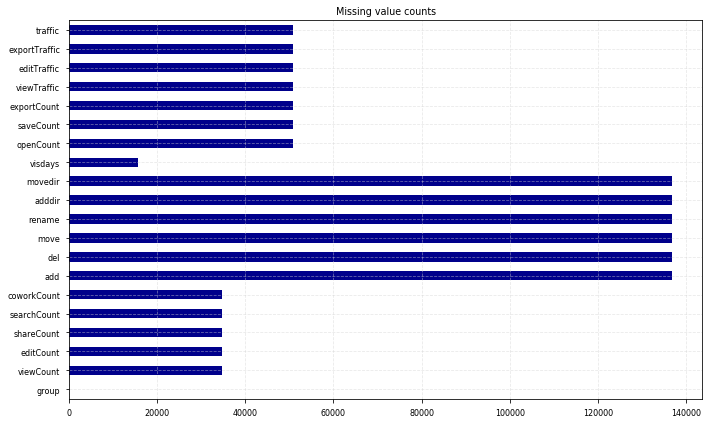

In [10]:
# check missing values in each cols
df.isnull().sum().plot(kind='barh', color='darkblue', figsize=(10,6))

plt.title("Missing value counts")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### 결측치 처리

- 추후에는 협의를 통해 결측치 발새 이유 파악 및 예방에 노력을 기울이는 것이 필요
- 결측치 처리 방법
    - 가장 쉬운 방법은 Null이 포함 행을 모두 제거하는 것이다
    - 사례(observation)이 많다면 이 방법을 사용하는 것이 가능하다
    - 평균, 중앙치, 최빈치, 간단한 예측 모델활용해서 imputation

    - 만약 샘플수가 충분하지 않을 경우, Pandas의 fillna() 명령어로 Null 값을 채우는 것이 가능하다. 
    - 연속형인 경우 Mean이나 Median을 이용하고 명목형인 경우 Mode(최빈치)나 classification 모델을 통해 Null 값을 대체할 수 있다.

```python
# Null 값을 median, mean으로 대체하는 코드 예제
df.fillna(df.med())
df.fillna(df.mean()) 

# Scikit-learn Imputation을 이용하여 명목변수의 Null 값을 Mode로 대체한 예제
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy='most_frequent', axis=0)
df['X'] = imp.fit_transform(df['X'])

# 참고: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
```

In [11]:
# 우선 group 컬럼이 null 경우만 선택
df[df['group'].isnull() == True].head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,


In [12]:
# visdays 컬럼이 null 경우만 선택
df[df['visdays'].isnull() == True].head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100022918449,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100009612042,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100017397956,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100030949780,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100021285047,sdu,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,5680128.0,0.0,0.0,5680128.0
10100025107423,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100038550949,sdu,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,2120744.0,0.0,0.0,2120744.0
10100013191329,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100038688226,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 특정 열을 기준으로 dropna
df1 = df.dropna(subset=['visdays'])

In [14]:
df1.head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100000624840,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06
10100036301327,sdu,25.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,10.0,25.0,0.0,0.0,3.1818e+07,0.0,0.0,3.1818e+07
10100038731798,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100039037854,sdu,4.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,4.0,0.0,0.0,1.9194e+05,0.0,0.0,1.9194e+05


In [15]:
df1.isnull().sum()

group                 0
viewCount         22534
editCount         22534
shareCount        22534
searchCount       22534
coworkCount       22534
add              121225
del              121225
move             121225
rename           121225
adddir           121225
movedir          121225
visdays               0
openCount         38403
saveCount         38403
exportCount       38403
viewTraffic       38403
editTraffic       38403
exportTraffic     38403
traffic           38403
dtype: int64

#### Q) visiday, group 을 제외한 나머지 항목이 nan이면 drop 해볼까요?

In [16]:
# subset 용 컬럼 설정
mycols = df1.columns[1:].drop('visdays')

# mycols 컬럼들을 기준으로 drop
df2 = df1.dropna(subset=mycols, how='all')

In [17]:
df2.head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06
10100036301327,sdu,25.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,10.0,25.0,0.0,0.0,3.1818e+07,0.0,0.0,3.1818e+07
10100039037854,sdu,4.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,4.0,0.0,0.0,1.9194e+05,0.0,0.0,1.9194e+05
10100038701419,mdu,27.0,34.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,27.0,35.0,0.0,4.2297e+06,208649.0,0.0,4.4383e+06
10100034746743,sdu,5.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,0.0,0.0,6.7553e+05,0.0,0.0,6.7553e+05


In [18]:
df2.isnull().sum()

group                 0
viewCount          1580
editCount          1580
shareCount         1580
searchCount        1580
coworkCount        1580
add              100271
del              100271
move             100271
rename           100271
adddir           100271
movedir          100271
visdays               0
openCount         17449
saveCount         17449
exportCount       17449
viewTraffic       17449
editTraffic       17449
exportTraffic     17449
traffic           17449
dtype: int64

In [19]:
df2[df2['viewCount'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100028912459,sdu,NaN,NaN,NaN,NaN,NaN,22.0,0.0,0.0,0.0,2.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100022395852,sdu,NaN,NaN,NaN,NaN,NaN,13.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100024336048,sdu,NaN,NaN,NaN,NaN,NaN,11820.0,0.0,0.0,0.0,93.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100031442724,sdu,NaN,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.0,2.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100025492049,sdu,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100011427498,sdu,NaN,NaN,NaN,NaN,NaN,93.0,0.0,0.0,1.0,2.0,0.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100034928127,sdu,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100031389762,sdu,NaN,NaN,NaN,NaN,NaN,72.0,0.0,7.0,1.0,23.0,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100008244902,sdu,NaN,NaN,NaN,NaN,NaN,27.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df2[df2['add'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100039037854,sdu,4.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,4.0,0.0,0.0,1.9194e+05,0.0,0.0,1.9194e+05
10100038701419,mdu,27.0,34.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,27.0,35.0,0.0,4.2297e+06,208649.0,0.0,4.4383e+06
10100034746743,sdu,5.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,0.0,0.0,6.7553e+05,0.0,0.0,6.7553e+05
10100023986518,sdu,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,0.0,0.0,2.8803e+05,0.0,0.0,2.8803e+05
10100006498305,sdu,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,0.0,2.9094e+05,44032.0,0.0,3.3497e+05
10100038316936,mdu,13.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,28.0,13.0,0.0,0.0,6.0651e+07,0.0,0.0,6.0651e+07


In [21]:
df2[df2['openCount'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100026531335,sdu,18.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036725270,sdu,50.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100019287454,sdu,9.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100029507725,sdu,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100012973812,sdu,10.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100034324468,sdu,40.0,13.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036076757,sdu,11.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100032604810,sdu,12.0,9.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100027655619,sdu,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df2[df2['traffic'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100026531335,sdu,18.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036725270,sdu,50.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100019287454,sdu,9.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100029507725,sdu,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100012973812,sdu,10.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100034324468,sdu,40.0,13.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036076757,sdu,11.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100032604810,sdu,12.0,9.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100027655619,sdu,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### add, del ~ movedir 까지는 파일 management 관련 변수이므로 상대적 중요도 낮음
- 변수 삭제를 고려해볼 수 있으나 우선 pass
- 우선 메꾸고 추후 제거도 고려 가능

In [23]:
# zero로 imputaion
df2 = df2.fillna(0)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 20 columns):
group            163352 non-null object
viewCount        163352 non-null float64
editCount        163352 non-null float64
shareCount       163352 non-null float64
searchCount      163352 non-null float64
coworkCount      163352 non-null float64
add              163352 non-null float64
del              163352 non-null float64
move             163352 non-null float64
rename           163352 non-null float64
adddir           163352 non-null float64
movedir          163352 non-null float64
visdays          163352 non-null float64
openCount        163352 non-null float64
saveCount        163352 non-null float64
exportCount      163352 non-null float64
viewTraffic      163352 non-null float64
editTraffic      163352 non-null float64
exportTraffic    163352 non-null float64
traffic          163352 non-null float64
dtypes: float64(19), object(1)
memory usage: 26.2

In [25]:
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [26]:
# 간략한 기술 통계 확인
df2.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,1.6335e+05,1.6335e+05,1.6335e+05,1.6335e+05
mean,24.7940,1.5904,0.0760,1.0210,0.0031,12.1678,0.0031,0.0470,0.4136,0.1525,0.0024,10.0200,22.2051,2.4596,0.0079,2.3185e+07,6.5401e+05,3.5804e+03,2.3842e+07
std,36.9357,19.7058,0.5361,8.9742,0.2834,109.6293,0.1661,0.9756,39.4028,2.2262,0.1472,6.6873,35.7233,16.6034,0.3151,1.3341e+08,7.3417e+06,4.0238e+05,1.3464e+08
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,0.0000,5.3680e+05,0.0000e+00,0.0000e+00,5.8992e+05
50%,14.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,12.0000,0.0000,0.0000,4.2315e+06,0.0000e+00,0.0000e+00,4.4294e+06
75%,30.0000,0.0000,0.0000,0.0000,0.0000,15.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.0000,27.0000,0.0000,0.0000,1.7401e+07,7.4540e+03,0.0000e+00,1.8059e+07
max,3005.0000,5267.0000,78.0000,893.0000,63.0000,17755.0000,28.0000,127.0000,8248.0000,355.0000,32.0000,31.0000,3005.0000,1432.0000,54.0000,2.8260e+10,1.2339e+09,1.1999e+08,2.8260e+10


### Missing Value 처리 가이드

- Missing Value 파악을 위해 `df.info()` 가장 처음에 이용
- 만약 np.nan으로 적절히 missing value로 불러왔다면 info() 이용 가능하지만,
- '', ' ' 이런식의 공백이나 다른 방식(.)으로 처리되어 있다면, 모두 repalce 처리해야함
- `df.info()`를 실행했을 때, 누가봐도 float or int 인데 object(string)으로 되어 있다면 이런 사레가 포함될 가능성 높음

In [27]:
# 가짜 dataframe 생성
tt = df2[['group', 'viewCount']]

tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100037810674,sdu,23.0
10100036273719,sdu,4.0
10100027752244,sdu,6.0
10100006151000,sdu,33.0


In [28]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
group        163352 non-null object
viewCount    163352 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [29]:
# np.nan 대신 ''로 수집된 경우
tt.loc[10100037810674,'viewCount'] = ''
tt.loc[10100036273719,'viewCount'] = ''

# np.nan 대신 '.'로 수집된 경우
tt.loc[10100034746743,'group'] = '. '
tt.loc[10100016781863,'group'] = '. '

# if missing is zero.......?

In [30]:
tt.head(10)

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,
10100036273719,sdu,
10100027752244,sdu,6
10100006151000,sdu,33
10100036301327,sdu,25
10100039037854,sdu,4
10100038701419,mdu,27
10100034746743,.,5


In [31]:
tt.info() # if continous var such as viewcount is object object?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
group        163352 non-null object
viewCount    163352 non-null object
dtypes: object(2)
memory usage: 8.7+ MB


In [32]:
# 만약 큰 데이터셋에서는 찾는 경우는 정렬을 이용
tt.sort_values("viewCount", ascending=False).head(10)

,group,viewCount
iduser,,
10100036273719,sdu,
10100037810674,sdu,
10100004393355,sdu,3005
10100028865215,sdu,2373
10100001015133,sdu,1643
10100018982273,sdu,1578
10100036794381,sdu,1325
10100038699275,sdu,1178
10100038295824,mdu,1117


In [33]:
tt.query("viewCount == ''")

,group,viewCount
iduser,,
10100037810674,sdu,
10100036273719,sdu,


In [34]:
tt.sort_values("group", ascending=True).head(10)

,group,viewCount
iduser,,
10100034746743,.,5
10100016781863,.,18
10100038554737,mdu,6
10100036899070,mdu,3
10100032736965,mdu,123
10100021842114,mdu,6
10100037737310,mdu,74
10100010236643,mdu,20
10100023425393,mdu,46


In [35]:
tt.query("group == '.'")

,group,viewCount
iduser,,


In [36]:
# 공백 제거
tt['group'] = tt['group'].str.strip()

In [37]:
tt.query("group == '.'")

,group,viewCount
iduser,,
10100034746743,.,5
10100016781863,.,18


In [38]:
# 만약 변수에 공백이 있을 경우
tt.columns = ['group ', ' viewCount']

In [39]:
tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,
10100036273719,sdu,
10100027752244,sdu,6
10100006151000,sdu,33


In [40]:
# strip 함수 이용
tt.columns = tt.columns.str.strip()

In [41]:
# if no float, replace with np.nan
for i in tt.index:
    if type(tt.loc[i, 'viewCount']) == float:
        tt.loc[i, 'viewCount'] == tt.loc[i, 'viewCount']    
    else:
        tt.loc[i, 'viewCount'] = np.nan

In [42]:
tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,NaN
10100036273719,sdu,NaN
10100027752244,sdu,6
10100006151000,sdu,33


In [43]:
# replace 이용 방식 (단 에러 값을 정확히 알고 있어야 함)
tt['group'] = tt['group'].replace('.', np.nan)

In [44]:
tt.head(10)

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,NaN
10100036273719,sdu,NaN
10100027752244,sdu,6
10100006151000,sdu,33
10100036301327,sdu,25
10100039037854,sdu,4
10100038701419,mdu,27
10100034746743,NaN,5


In [45]:
tt.isnull().sum()

group        2
viewCount    2
dtype: int64

In [46]:
# fill null with mean
tt['viewCount'] = tt['viewCount'].fillna(tt.viewCount.mean())

# fill null with mode
tt['group'] = tt['group'].fillna(tt.group.value_counts().index[0])

In [47]:
tt.head(10)

,group,viewCount
iduser,,
10100018739106,sdu,12.0000
10100037810674,sdu,24.7942
10100036273719,sdu,24.7942
10100027752244,sdu,6.0000
10100006151000,sdu,33.0000
10100036301327,sdu,25.0000
10100039037854,sdu,4.0000
10100038701419,mdu,27.0000
10100034746743,sdu,5.0000


### 결측치를 처리할 때 고려할 점
- 결측치를 처리할 경우에도 도메인 지식은 유용하게 사용된다.
- 인적, 기계적 원인임이 판명되면, 협업자와 지속적으로 노력해 결측치를 **사전에 발생하지 않도록 조치**하는 것이 좋다
- 수치형인 경우 의미상으로 0으로 메꾸는 것이 맞는지 아니면 평균이나 중앙치, 최빈치가 맞는지 정확히 판단해야 한다.
    - 예를 들어 viewCount가 1이상인데, edit, export가 missing인 경우 (도메인 지식을 통해) 0으로 메꾸는 것이 가능하다.
    - 왜냐하면, ViewCount가 다른 행동에 선행하는 개념이기 때문에 위와 같은 의사결정이 가능하다
- 특히 **숫자 0과 null 과 같은 결측치는 완전히 다른 개념**이니 유의해야 한다.
    - 0: -1과 1 사이의 가운데 값(숫자)임. '제로'라는 의미를 지니고 있음.
    - null or nan: 미지의 값 (모름)
- 만약 y label(위 샘플 데이터에서는 'group')에 결측치가 있다면 그냥 drop\
- pandas 결측치 관련 API: https://pandas.pydata.org/pandas-docs/stable/missing_data.html
- 참고 블로그: https://machinelearningmastery.com/handle-missing-data-python/

### 이상치(Outlier) 처리 방법

#### 0. 이상치란?

>In statistics, an outlier is a data point that differs greatly from other values in a data set. Outliers are important to keep in mind when looking at pools of data because they can sometimes affect how the data is perceived on the whole.


#### 1. 표준편차(standard deviation) 이용
- 현재 분포에서 표준편차 기준 +3 이상이거나 -3 이하인 경우 극단치로 처리
- 정규분포일 경우 유용

#### 2. 표준점수(z-score) 이용
- 평균을 0, 표준편차를 1로 맞춘후 표준편차 이용 (+-3 벗어난 경우 이상치로 판정)
- 정규분포일 경우 유용

![img](out_std.png)


#### 3. IQR 방식
- 75 percentile + IQR * 1.5 이상이거나 25 percentile + IQR * 1.5 이하인 경우 극단치로 처리
- 정규분포 아닐 경우 robust한 편

![img](out_iqr.png)

#### 4. 기타 방법
- Rule-based (ex, percentile 95% 이상이면 제거)
- Binning (연속변인을 카테고리형으로 변환)

#### 5. 발생이유
- 입력 오류, 측정 오류, 고의성, 처리시 에러, 샘플링에러, 자연발생 등
- 예방이 가장 좋음

In [48]:
# 이상치 처리 대상 데이터 (NA 제거한 dataframe)
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [49]:
# 숫자형 변수만 선택
# df3 = df2.drop("group", axis=1) 
df3 = df2._get_numeric_data() 

In [50]:
df3.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,1.6335e+05,1.6335e+05,1.6335e+05,1.6335e+05
mean,24.7940,1.5904,0.0760,1.0210,0.0031,12.1678,0.0031,0.0470,0.4136,0.1525,0.0024,10.0200,22.2051,2.4596,0.0079,2.3185e+07,6.5401e+05,3.5804e+03,2.3842e+07
std,36.9357,19.7058,0.5361,8.9742,0.2834,109.6293,0.1661,0.9756,39.4028,2.2262,0.1472,6.6873,35.7233,16.6034,0.3151,1.3341e+08,7.3417e+06,4.0238e+05,1.3464e+08
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,0.0000,5.3680e+05,0.0000e+00,0.0000e+00,5.8992e+05
50%,14.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,12.0000,0.0000,0.0000,4.2315e+06,0.0000e+00,0.0000e+00,4.4294e+06
75%,30.0000,0.0000,0.0000,0.0000,0.0000,15.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.0000,27.0000,0.0000,0.0000,1.7401e+07,7.4540e+03,0.0000e+00,1.8059e+07
max,3005.0000,5267.0000,78.0000,893.0000,63.0000,17755.0000,28.0000,127.0000,8248.0000,355.0000,32.0000,31.0000,3005.0000,1432.0000,54.0000,2.8260e+10,1.2339e+09,1.1999e+08,2.8260e+10


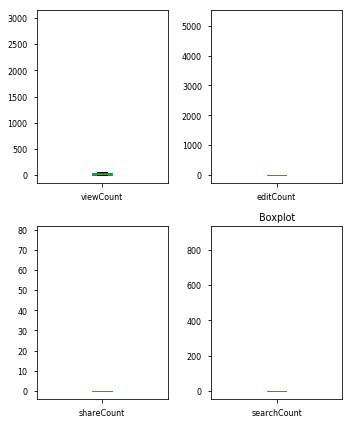

In [51]:
fig, ax = plt.subplots(2, 2)

df3['viewCount'].plot(kind='box', ax=ax[0, 0], figsize=(5, 6));
df3['editCount'].plot(kind='box', ax=ax[0, 1], figsize=(5, 6));
df3['shareCount'].plot(kind='box', ax=ax[1, 0], figsize=(5, 6));
df3['searchCount'].plot(kind='box', ax=ax[1, 1], figsize=(5, 6));

plt.title("Boxplot")
plt.tight_layout()

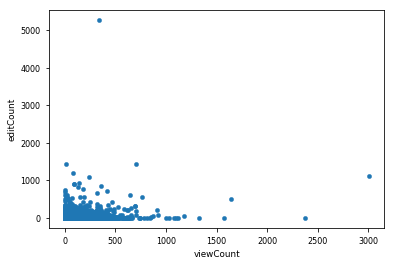

In [52]:
df3.plot(kind='scatter', x='viewCount', y='editCount');

In [53]:
# 표준편차 이용 (6-sigma): 각 컬럼별 표준편차에서 +- std 벗어난 경우 제외
def std_based_outlier(df):

    for i in range(0, len(df.iloc[1])): 
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]

        return(df)

In [54]:
df3_std = std_based_outlier(df3)

In [55]:
df3_std.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,160969.0000,1.6097e+05,1.6097e+05,1.6097e+05,1.6097e+05
mean,21.9071,1.2462,0.0708,0.8301,0.0020,11.0416,0.0026,0.0348,0.3181,0.1442,0.0022,9.8189,19.6355,1.9134,0.0062,2.1146e+07,5.6852e+05,2.3888e+03,2.1717e+07
std,22.9598,11.3780,0.4535,5.6901,0.1789,108.4248,0.1417,0.6232,32.3027,2.2150,0.1445,6.4894,22.6327,10.5958,0.2420,1.0558e+08,6.4483e+06,2.6860e+05,1.0678e+08
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,0.0000,5.2424e+05,0.0000e+00,0.0000e+00,5.7525e+05
50%,14.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,12.0000,0.0000,0.0000,4.1152e+06,0.0000e+00,0.0000e+00,4.2926e+06
75%,29.0000,0.0000,0.0000,0.0000,0.0000,14.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13.0000,26.0000,0.0000,0.0000,1.6753e+07,1.4100e+02,0.0000e+00,1.7323e+07
max,135.0000,1436.0000,41.0000,293.0000,42.0000,17755.0000,27.0000,66.0000,7907.0000,355.0000,32.0000,31.0000,135.0000,1069.0000,51.0000,1.3476e+10,1.2339e+09,8.1772e+07,1.3476e+10


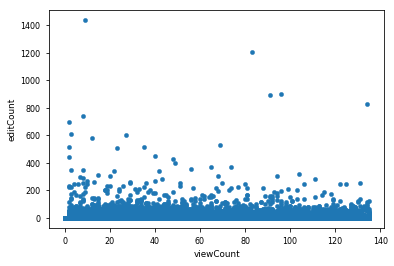

In [56]:
df3_std.plot(kind='scatter', x='viewCount', y='editCount');

In [57]:
## 가장 자주 쓰이는 방식
# z-score 이용: 표준점수로 변환후 +-3 std 벗어나는 경우 제거
from scipy import stats

df3_zscore = df3[(np.abs(stats.zscore(df3)) < 3).all(axis=1)]

In [58]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0,154089.0000,154089.0,154089.0000,154089.0000,154089.0000,154089.0,154089.0000,154089.0000,154089.0000,154089.0,1.5409e+05,1.5409e+05,154089.0000,1.5409e+05
mean,20.6225,0.5710,0.0335,0.3206,0.0,8.4366,0.0,0.0059,0.0188,0.0735,0.0,9.4338,18.3732,1.0929,0.0,1.6434e+07,2.8529e+05,1.5041,1.6719e+07
std,21.2937,3.1927,0.1800,1.9344,0.0,16.1130,0.0,0.0906,0.6807,0.3353,0.0,6.1148,20.9628,4.0835,0.0,3.5799e+07,1.5345e+06,418.9356,3.6059e+07
min,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,2.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,5.0000,4.0000,0.0000,0.0,4.9182e+05,0.0000e+00,0.0000,5.3602e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,8.0000,11.0000,0.0000,0.0,3.9214e+06,0.0000e+00,0.0000,4.0650e+06
75%,27.0000,0.0000,0.0000,0.0000,0.0,14.0000,0.0,0.0000,0.0000,0.0000,0.0,13.0000,25.0000,0.0000,0.0,1.5727e+07,0.0000e+00,0.0000,1.6189e+07
max,135.0000,60.0000,1.0000,27.0000,0.0,336.0000,0.0,2.0000,115.0000,6.0000,0.0,30.0000,129.0000,52.0000,0.0,4.2278e+08,2.2664e+07,125497.0000,4.2634e+08


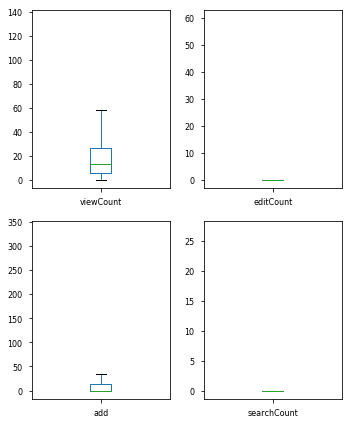

In [59]:
fig, ax = plt.subplots(2, 2)

df3_zscore['viewCount'].plot(kind='box', ax=ax[0, 0], figsize=(5, 6));
df3_zscore['editCount'].plot(kind='box', ax=ax[0, 1], figsize=(5, 6));
df3_zscore['add'].plot(kind='box', ax=ax[1, 0], figsize=(5, 6));
df3_zscore['searchCount'].plot(kind='box', ax=ax[1, 1], figsize=(5, 6));

plt.tight_layout()

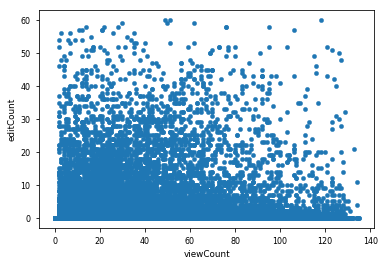

In [60]:
df3_zscore.plot(kind='scatter', x='viewCount', y='editCount');

#### original std vs z-score std
- 원 데이터로 처리시 매우 보수적인 결과 -> 효과가 낮아서 자주 쓰이지 않음
- 일반적으로 z-score 자주 활용, 단 정규분포에 효과적
- 정규분포가 아닐 경우, IQR 고려

In [61]:
# IQR
df3 = df2._get_numeric_data() 

for i in range(0, len(df3.iloc[1])): 
        
    q1 = df3.iloc[:,i].quantile(0.25)
    q3 = df3.iloc[:,i].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr       

    df3 = df3[(df3.iloc[:,i] >= fence_low) & (df3.iloc[:,i] <= fence_high)]

In [62]:
df3.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,76304.0000,76304.0,76304.0,76304.0,76304.0,76304.0000,76304.0,76304.0,76304.0,76304.0,76304.0,76304.0000,76304.0000,76304.0,76304.0,7.6304e+04,76304.0,76304.0,7.6304e+04
mean,10.8109,0.0,0.0,0.0,0.0,2.9787,0.0,0.0,0.0,0.0,0.0,6.6413,8.5492,0.0,0.0,3.4474e+06,0.0,0.0,3.4474e+06
std,8.9734,0.0,0.0,0.0,0.0,6.4260,0.0,0.0,0.0,0.0,0.0,3.8085,8.2231,0.0,0.0,4.2413e+06,0.0,0.0,4.2413e+06
min,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,2.0000,0.0000,0.0,0.0,0.0000e+00,0.0,0.0,0.0000e+00
25%,4.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,4.0000,3.0000,0.0,0.0,1.7510e+05,0.0,0.0,1.7510e+05
50%,8.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,6.0000,6.0000,0.0,0.0,1.5659e+06,0.0,0.0,1.5659e+06
75%,15.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,9.0000,12.0000,0.0,0.0,5.3728e+06,0.0,0.0,5.3728e+06
max,66.0000,0.0,0.0,0.0,0.0,30.0000,0.0,0.0,0.0,0.0,0.0,19.0000,39.0000,0.0,0.0,1.6882e+07,0.0,0.0,1.6882e+07


#### 최종 검토
- IQR: 분포가 쏠려 있어서 (거의 median이 0), 조금만 벗어나도 이상치로 판정
- 최종 선정은 zscore 기준으로 우선 선택!!

In [63]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0,154089.0000,154089.0,154089.0000,154089.0000,154089.0000,154089.0,154089.0000,154089.0000,154089.0000,154089.0,1.5409e+05,1.5409e+05,154089.0000,1.5409e+05
mean,20.6225,0.5710,0.0335,0.3206,0.0,8.4366,0.0,0.0059,0.0188,0.0735,0.0,9.4338,18.3732,1.0929,0.0,1.6434e+07,2.8529e+05,1.5041,1.6719e+07
std,21.2937,3.1927,0.1800,1.9344,0.0,16.1130,0.0,0.0906,0.6807,0.3353,0.0,6.1148,20.9628,4.0835,0.0,3.5799e+07,1.5345e+06,418.9356,3.6059e+07
min,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,2.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,5.0000,4.0000,0.0000,0.0,4.9182e+05,0.0000e+00,0.0000,5.3602e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,8.0000,11.0000,0.0000,0.0,3.9214e+06,0.0000e+00,0.0000,4.0650e+06
75%,27.0000,0.0000,0.0000,0.0000,0.0,14.0000,0.0,0.0000,0.0000,0.0000,0.0,13.0000,25.0000,0.0000,0.0,1.5727e+07,0.0000e+00,0.0000,1.6189e+07
max,135.0000,60.0000,1.0000,27.0000,0.0,336.0000,0.0,2.0000,115.0000,6.0000,0.0,30.0000,129.0000,52.0000,0.0,4.2278e+08,2.2664e+07,125497.0000,4.2634e+08


In [64]:
# max가 0인 컬럼은 제거
cols_max = df3_zscore.describe().loc['max']
drop_cols = cols_max[cols_max == 0]

df3_zscore.drop(drop_cols.index, axis=1, inplace=True)

In [65]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,1.5409e+05,1.5409e+05,154089.0000,1.5409e+05
mean,20.6225,0.5710,0.0335,0.3206,8.4366,0.0059,0.0188,0.0735,9.4338,18.3732,1.0929,1.6434e+07,2.8529e+05,1.5041,1.6719e+07
std,21.2937,3.1927,0.1800,1.9344,16.1130,0.0906,0.6807,0.3353,6.1148,20.9628,4.0835,3.5799e+07,1.5345e+06,418.9356,3.6059e+07
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,4.9182e+05,0.0000e+00,0.0000,5.3602e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,11.0000,0.0000,3.9214e+06,0.0000e+00,0.0000,4.0650e+06
75%,27.0000,0.0000,0.0000,0.0000,14.0000,0.0000,0.0000,0.0000,13.0000,25.0000,0.0000,1.5727e+07,0.0000e+00,0.0000,1.6189e+07
max,135.0000,60.0000,1.0000,27.0000,336.0000,2.0000,115.0000,6.0000,30.0000,129.0000,52.0000,4.2278e+08,2.2664e+07,125497.0000,4.2634e+08


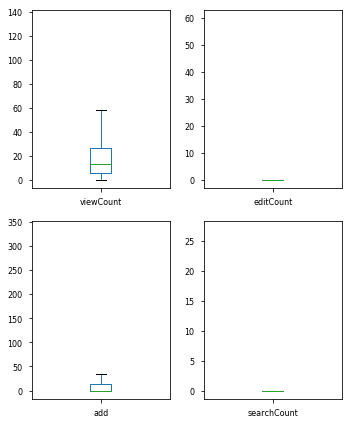

In [66]:
fig, ax = plt.subplots(2, 2)

df3_zscore['viewCount'].plot(kind='box', ax=ax[0, 0], figsize=(5, 6));
df3_zscore['editCount'].plot(kind='box', ax=ax[0, 1], figsize=(5, 6));
df3_zscore['add'].plot(kind='box', ax=ax[1, 0], figsize=(5, 6));
df3_zscore['searchCount'].plot(kind='box', ax=ax[1, 1], figsize=(5, 6));

plt.tight_layout()

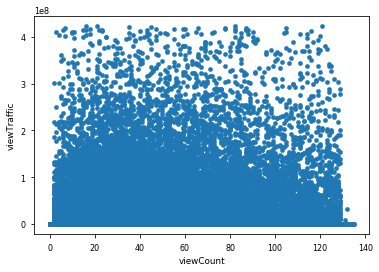

In [67]:
df3_zscore.plot(kind='scatter', x='viewCount', y='viewTraffic');

### 분포 변환
- Transformation
    - if right skewed: Log, Sqrt, cube root functions
    - if left skwed: square
- left_distribution: X^3
- mild_left: X^2
- mild_right: sqrt(X)
- right: ln(X)
- servere right: 1/X    
    
![img](skwed.png)

- source: http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_03.pdf

- Reference
    - http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
    - http://scikit-learn.org/stable/modules/preprocessing.html

In [68]:
df4 = df3_zscore.copy()

In [69]:
df4.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [70]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154089 entries, 10100018739106 to 10100021804275
Data columns (total 15 columns):
viewCount        154089 non-null float64
editCount        154089 non-null float64
shareCount       154089 non-null float64
searchCount      154089 non-null float64
add              154089 non-null float64
move             154089 non-null float64
rename           154089 non-null float64
adddir           154089 non-null float64
visdays          154089 non-null float64
openCount        154089 non-null float64
saveCount        154089 non-null float64
viewTraffic      154089 non-null float64
editTraffic      154089 non-null float64
exportTraffic    154089 non-null float64
traffic          154089 non-null float64
dtypes: float64(15)
memory usage: 18.8 MB


In [71]:
# 분포를 간단히 확인 with IQR, MIN, MAX, MEAN, STD
df4.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,1.5409e+05,1.5409e+05,154089.0000,1.5409e+05
mean,20.6225,0.5710,0.0335,0.3206,8.4366,0.0059,0.0188,0.0735,9.4338,18.3732,1.0929,1.6434e+07,2.8529e+05,1.5041,1.6719e+07
std,21.2937,3.1927,0.1800,1.9344,16.1130,0.0906,0.6807,0.3353,6.1148,20.9628,4.0835,3.5799e+07,1.5345e+06,418.9356,3.6059e+07
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,4.9182e+05,0.0000e+00,0.0000,5.3602e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,11.0000,0.0000,3.9214e+06,0.0000e+00,0.0000,4.0650e+06
75%,27.0000,0.0000,0.0000,0.0000,14.0000,0.0000,0.0000,0.0000,13.0000,25.0000,0.0000,1.5727e+07,0.0000e+00,0.0000,1.6189e+07
max,135.0000,60.0000,1.0000,27.0000,336.0000,2.0000,115.0000,6.0000,30.0000,129.0000,52.0000,4.2278e+08,2.2664e+07,125497.0000,4.2634e+08


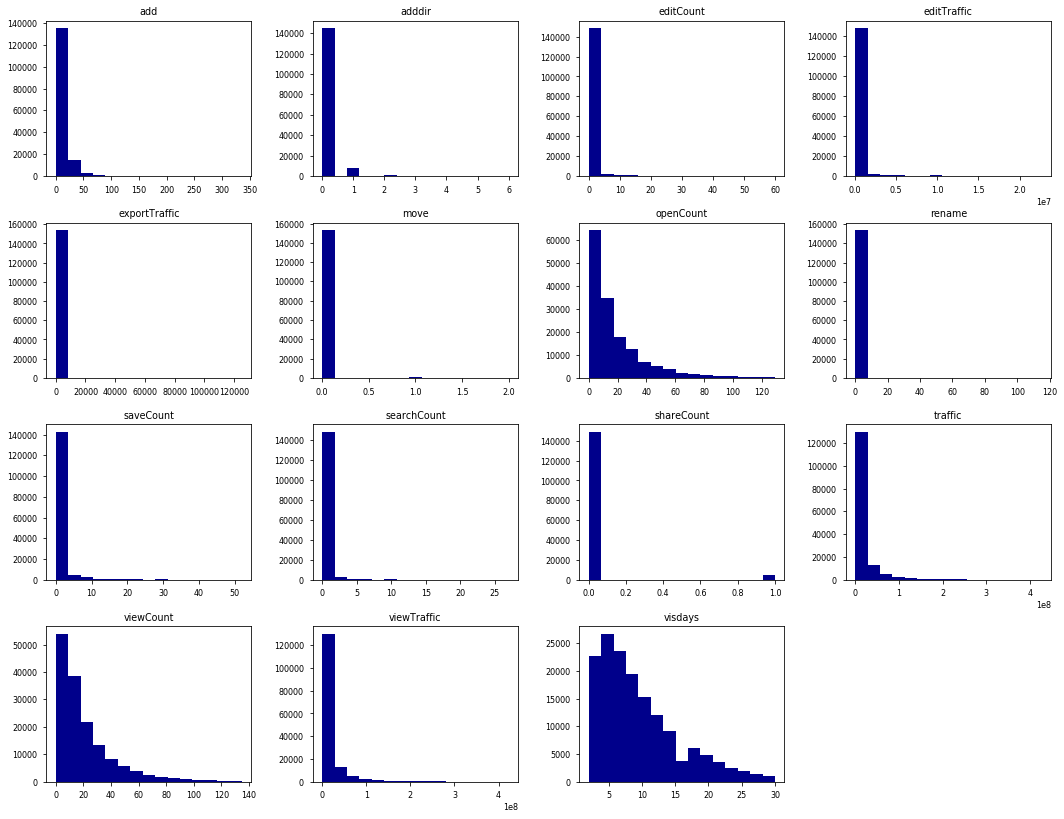

In [72]:
# Outlier 미처리시 skewness 더 심해짐
df4.hist(bins=15, color='darkblue', figsize=(18,14), grid=False); 

plt.grid(False)

In [73]:
# log 함수 적용 (if right skewed)
df4_log = df4.apply(lambda x: np.log(x+1))    

df4_log.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000
mean,2.6544,0.1452,0.0232,0.0921,1.1105,0.0038,0.0065,0.0460,2.1781,2.3782,0.2998,13.5236,2.7590,0.0002,13.5959
std,0.9364,0.5091,0.1248,0.4045,1.4853,0.0558,0.0966,0.1914,0.5851,1.1934,0.6823,5.2184,5.1431,0.0420,5.1779
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0986,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.9459,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7918,1.6094,0.0000,13.1059,0.0000,0.0000,13.1919
50%,2.6391,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1972,2.4849,0.0000,15.1820,0.0000,0.0000,15.2179
75%,3.3322,0.0000,0.0000,0.0000,2.7081,0.0000,0.0000,0.0000,2.6391,3.2581,0.0000,16.5709,0.0000,0.0000,16.5999
max,4.9127,4.1109,0.6931,3.3322,5.8201,1.0986,4.7536,1.9459,3.4340,4.8675,3.9703,19.8624,16.9363,11.7400,19.8707


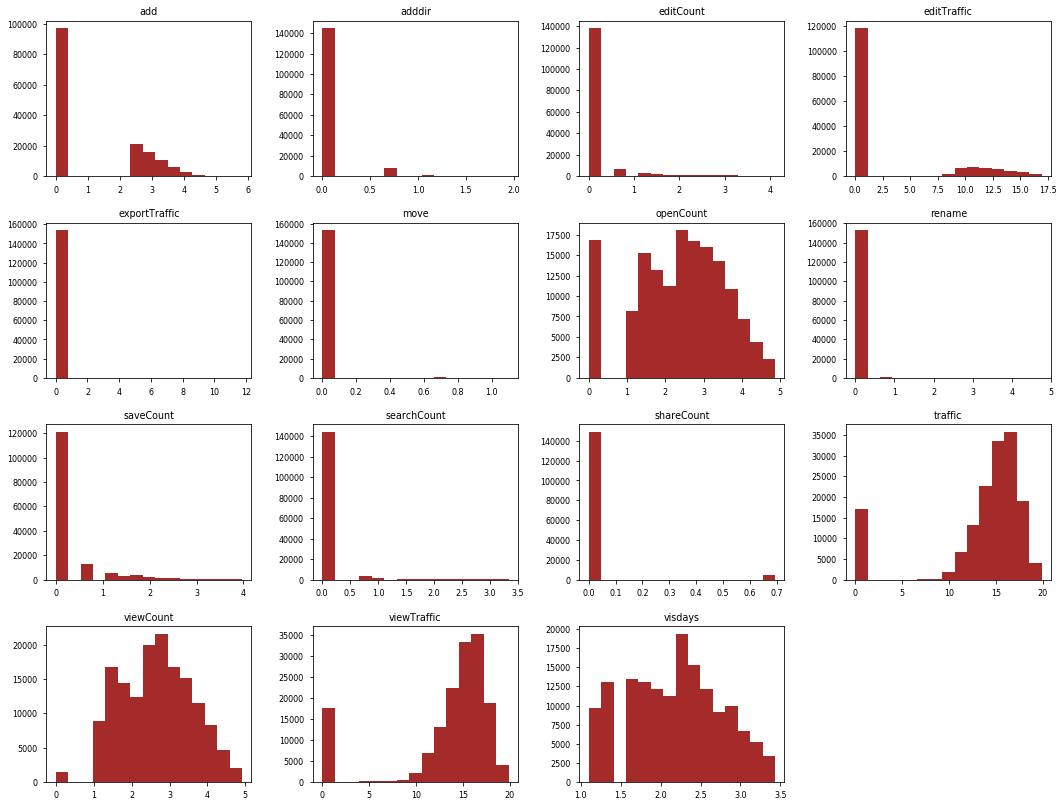

In [74]:
df4_log.hist(bins=15, color='brown', figsize=(18,14), grid=False);

In [75]:
# 다른 함수 적용
df4_cube_root = df4.apply(lambda x: x ** (1. / 3))    

df4_cube_root.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000
mean,2.4639,0.1545,0.0335,0.0965,1.0043,0.0051,0.0075,0.0622,2.0170,2.2076,0.3186,176.0217,16.1502,0.0006,177.9968
std,0.8555,0.4991,0.1800,0.3951,1.3541,0.0736,0.1037,0.2510,0.4466,1.0972,0.6669,130.6533,39.5669,0.1756,130.7741
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.2599,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.8171,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7100,1.5874,0.0000,78.9346,0.0000,0.0000,81.2317
50%,2.3513,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.2240,0.0000,157.6939,0.0000,0.0000,159.5957
75%,3.0000,0.0000,0.0000,0.0000,2.4101,0.0000,0.0000,0.0000,2.3513,2.9240,0.0000,250.5409,0.0000,0.0000,252.9744
max,5.1299,3.9149,1.0000,3.0000,6.9521,1.2599,4.8629,1.8171,3.1072,5.0528,3.7325,750.5369,282.9937,50.0662,752.6357


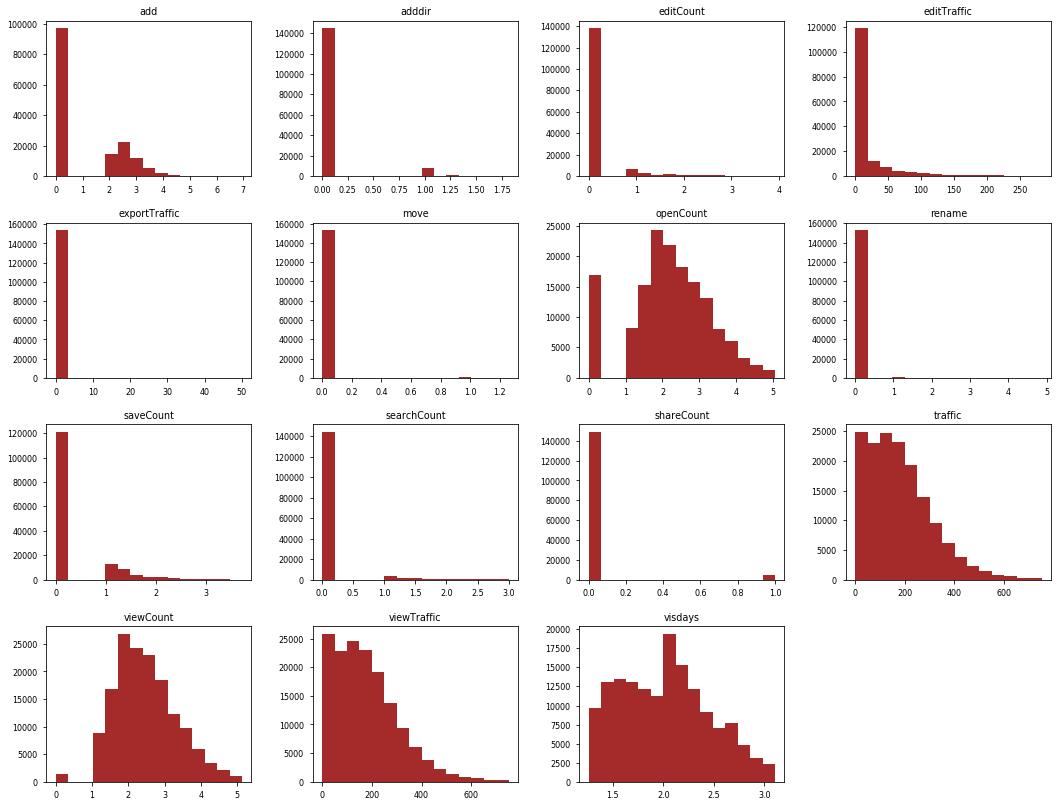

In [76]:
df4_cube_root.hist(bins=15, color='brown', figsize=(18,14), grid=False);

#### Q) 다양한 여러 함수를 적용해보시고 가장 정규분포로 잘 변환되는 함수를 찾아주세요.

In [77]:
# 다른 함수 적용

#### 우선 분포 변환은 Pass
- 원 분포대로 모델링 구축하고 추후 개선시 transform 진행

### 단위 표준화 (Scaling)
- 모든 변수의 단위를 동일한 기준(스케일)로 통일
    - 이번 사례의 경우 tarffic(byte) 변수로 인해, 필수적인 과정
- Standard Scaler (Mean: 0, std: 1)
- MinMax Scaler (default: min=0, max=1)
- Robust Scaler (x - q1 / q3-q1)
- Source: http://benalexkeen.com/feature-scaling-with-scikit-learn/

![img](scale_std.png)
![img](scale_minmax.png)
![img](scale_robust.png)

In [78]:
df4_std_scale = df4.copy() # after removes outliers

In [79]:
df4_std_scale.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [80]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

for c in df4_std_scale:
    df4_std_scale[c] = StandardScaler().fit_transform(np.array(df4_std_scale[c]).reshape(-1, 1)).round(4)

In [81]:
df4_std_scale.describe().round(2)

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00,154089.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.97,-0.18,-0.19,-0.17,-0.52,-0.07,-0.03,-0.22,-1.22,-0.88,-0.27,-0.46,-0.19,-0.00,-0.46
25%,-0.69,-0.18,-0.19,-0.17,-0.52,-0.07,-0.03,-0.22,-0.73,-0.69,-0.27,-0.45,-0.19,-0.00,-0.45
50%,-0.36,-0.18,-0.19,-0.17,-0.52,-0.07,-0.03,-0.22,-0.23,-0.35,-0.27,-0.35,-0.19,-0.00,-0.35
75%,0.30,-0.18,-0.19,-0.17,0.35,-0.07,-0.03,-0.22,0.58,0.32,-0.27,-0.02,-0.19,-0.00,-0.01
max,5.37,18.61,5.37,13.79,20.33,22.00,168.91,17.67,3.36,5.28,12.47,11.35,14.58,299.56,11.36


#### Q) 단위 변화후 분포에는 어떠한 변화가 있을까요?

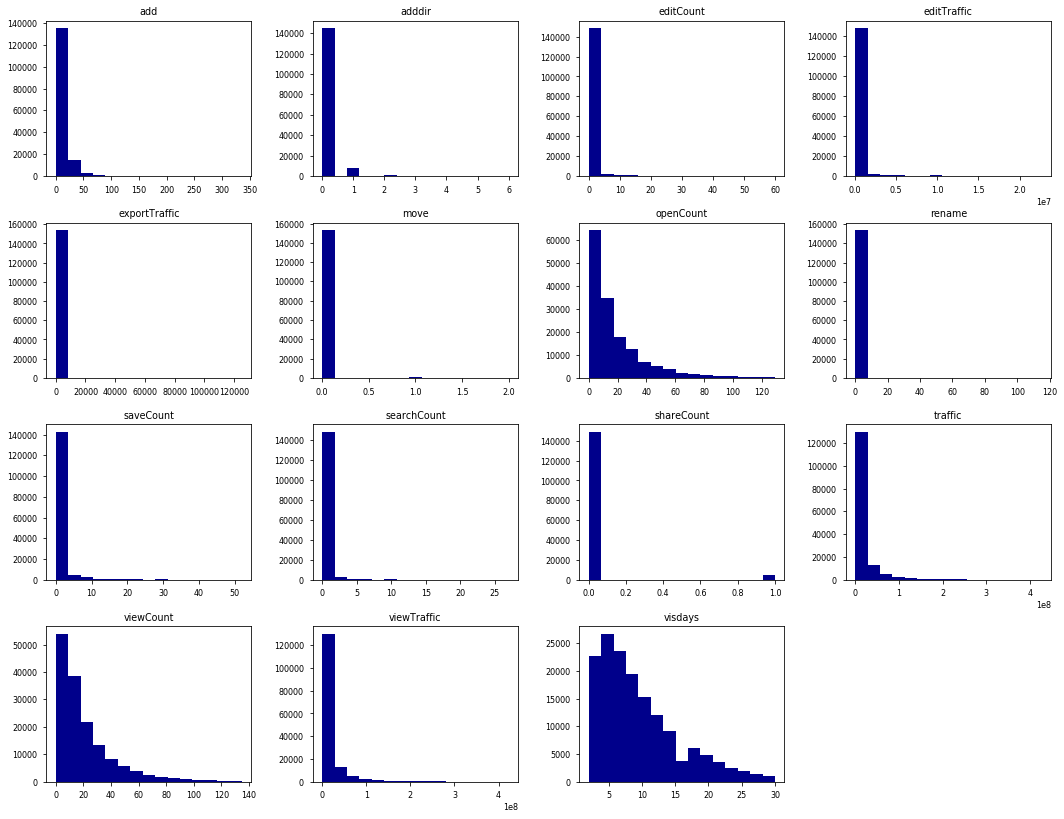

In [82]:
df4.hist(bins=15, color='darkblue', figsize=(18,14), grid=False);

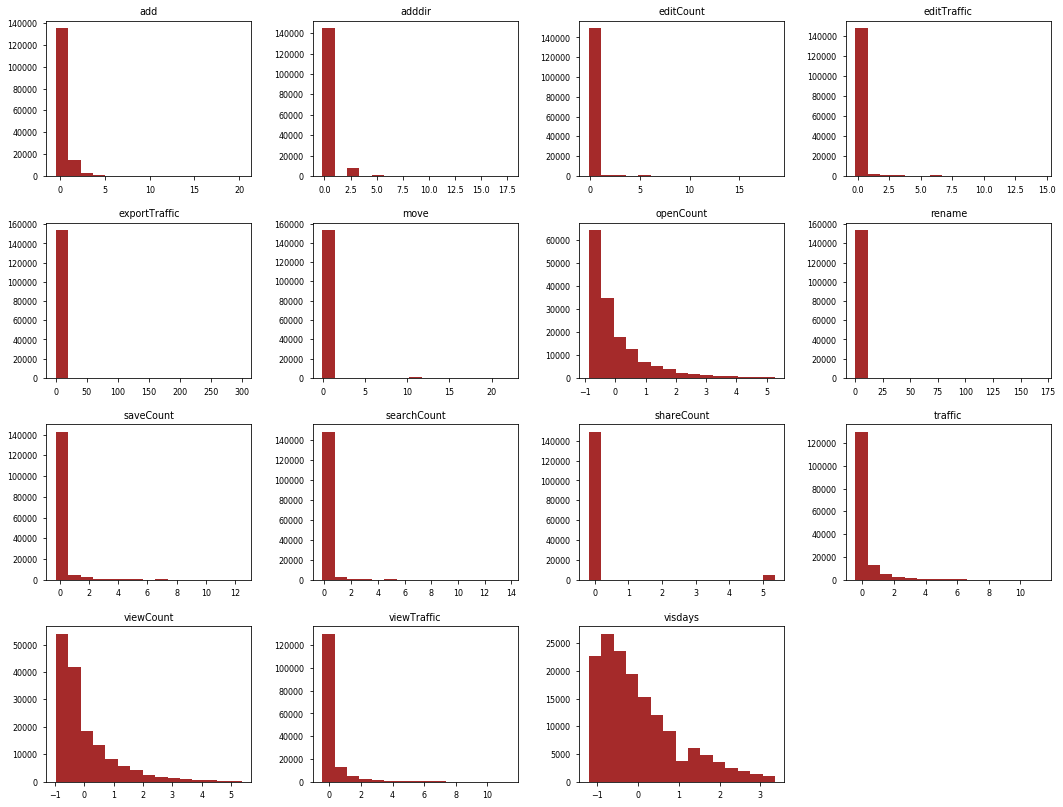

In [83]:
df4_std_scale.hist(bins=15, color='brown', figsize=(18,14), grid=False);

In [84]:
df4_minmax_scale = df4.copy()

In [85]:
from sklearn.preprocessing import MinMaxScaler

for c in df4_minmax_scale:
    df4_minmax_scale[c] = MinMaxScaler().fit_transform(np.array(df4_minmax_scale[c]).reshape(-1,1).round(4))

In [86]:
df4_minmax_scale.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,1.5409e+05,154089.0000
mean,0.1528,0.0095,0.0335,0.0119,0.0251,0.0030,0.0002,0.0123,0.2655,0.1424,0.0210,0.0389,0.0126,1.1985e-05,0.0392
std,0.1577,0.0532,0.1800,0.0716,0.0480,0.0453,0.0059,0.0559,0.2184,0.1625,0.0785,0.0847,0.0677,3.3382e-03,0.0846
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000
25%,0.0444,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1071,0.0310,0.0000,0.0012,0.0000,0.0000e+00,0.0013
50%,0.0963,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2143,0.0853,0.0000,0.0093,0.0000,0.0000e+00,0.0095
75%,0.2000,0.0000,0.0000,0.0000,0.0417,0.0000,0.0000,0.0000,0.3929,0.1938,0.0000,0.0372,0.0000,0.0000e+00,0.0380
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000e+00,1.0000


In [87]:
df4_robust_scale = df4.copy()

In [88]:
from sklearn.preprocessing import RobustScaler

for c in df4_robust_scale:
    df4_robust_scale[c] = RobustScaler().fit_transform(np.array(df4_robust_scale[c]).reshape(-1,1).round(4))

In [89]:
df4_robust_scale.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,1.5409e+05,154089.0000,154089.0000
mean,0.3630,0.5710,0.0335,0.3206,0.6026,0.0059,0.0188,0.0735,0.1792,0.3511,1.0929,0.8213,2.8529e+05,1.5041,0.8084
std,1.0140,3.1927,0.1800,1.9344,1.1509,0.0906,0.6807,0.3353,0.7644,0.9982,4.0835,2.3498,1.5345e+06,418.9356,2.3036
min,-0.6190,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.7500,-0.5238,0.0000,-0.2574,0.0000e+00,0.0000,-0.2597
25%,-0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3750,-0.3333,0.0000,-0.2251,0.0000e+00,0.0000,-0.2254
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000
75%,0.6667,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.6250,0.6667,0.0000,0.7749,0.0000e+00,0.0000,0.7746
max,5.8095,60.0000,1.0000,27.0000,24.0000,2.0000,115.0000,6.0000,2.7500,5.6190,52.0000,27.4936,2.2664e+07,125497.0000,26.9765


In [90]:
# dataset after removes outliers, not transform, no scale
df4.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [91]:
df5 = df4.join(df2['group'])

In [92]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic,group
iduser,,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06,sdu
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07,sdu
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06,sdu
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05,sdu
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06,sdu


In [93]:
df5.describe() 

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,154089.0000,1.5409e+05,1.5409e+05,154089.0000,1.5409e+05
mean,20.6225,0.5710,0.0335,0.3206,8.4366,0.0059,0.0188,0.0735,9.4338,18.3732,1.0929,1.6434e+07,2.8529e+05,1.5041,1.6719e+07
std,21.2937,3.1927,0.1800,1.9344,16.1130,0.0906,0.6807,0.3353,6.1148,20.9628,4.0835,3.5799e+07,1.5345e+06,418.9356,3.6059e+07
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,4.9182e+05,0.0000e+00,0.0000,5.3602e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,11.0000,0.0000,3.9214e+06,0.0000e+00,0.0000,4.0650e+06
75%,27.0000,0.0000,0.0000,0.0000,14.0000,0.0000,0.0000,0.0000,13.0000,25.0000,0.0000,1.5727e+07,0.0000e+00,0.0000,1.6189e+07
max,135.0000,60.0000,1.0000,27.0000,336.0000,2.0000,115.0000,6.0000,30.0000,129.0000,52.0000,4.2278e+08,2.2664e+07,125497.0000,4.2634e+08


####  [Multicollinearity](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1)
- 변수 삭제 1): EX) editTraffic, exportTraffic, viewTraffic, openCount
- 변수 삭제 2): 분포가 정상이 아닌 경우 (우선 유지)
- 변수 축소 EX) PCA, Factor Analysis, etc

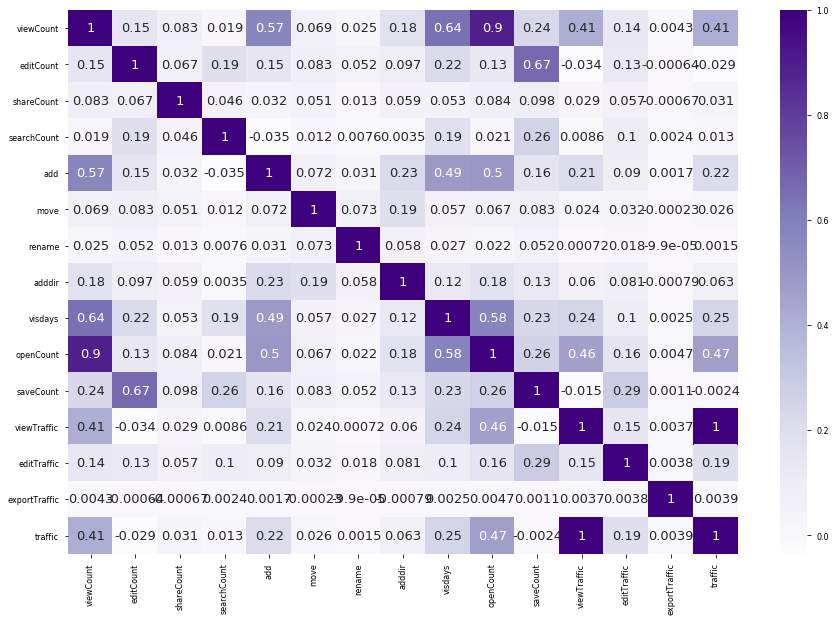

In [94]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df5.corr(), annot=True, annot_kws={"size": 13}, cmap='Purples');

In [95]:
# 상관관계 높은 변수 제거
drop_cols = ['editTraffic', 'exportTraffic', 'viewTraffic', 'openCount']

In [96]:
df5.drop(drop_cols, axis=1, inplace=True)

In [97]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.5048e+06,sdu
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,1.7123e+07,sdu
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.2344e+06,sdu
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.1248e+05,sdu
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4.3077e+06,sdu


#### Imbalance Issues
- 결제자 여부에 대한 데이터 사례가 불충분 => 모델이 sdu 로 대부분 예측하는 결과
    - SDU(0)를 SDU(0)로 예측하는 정확도(True Negative)는 높을 수있으나, MDU(1)를 MDU(1) 예측하는 TP는 낮을 것으로 예상
- how to handle imbalance    
    - https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [98]:
df5.group.value_counts().transform(lambda x: x / x.sum())

sdu    0.9668
mdu    0.0332
Name: group, dtype: float64

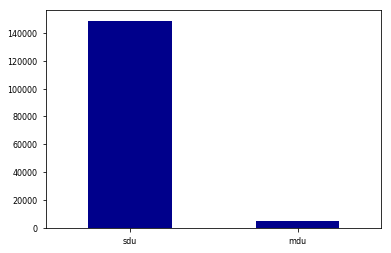

In [99]:
df5.group.value_counts().plot(kind='bar', color='darkblue', rot=0)

In [100]:
df5['group'] = np.where(df5['group'] == 'sdu', 0, 1) 

In [101]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.5048e+06,0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,1.7123e+07,0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.2344e+06,0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.1248e+05,0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4.3077e+06,0


### 분류 모델 종류
 - **Logistic Regression**
     - Logistic regression fits a logistic model to data and makes predictions about the probability of an event (between 0 and 
 - **Naive Bayes**
    - Naive Bayes uses Bayes Theorem to model the conditional relationship of each attribute to the class variable
 - **k-Nearest Neighbor**
    - The k-Nearest Neighbor (kNN) method makes predictions by locating similar cases to a given data instance (using a similarity function) and returning the average or majority of the most similar data instances. The kNN algorithm can be used for classification or regression.
 - **Trees-based model**
    - Classification and Regression Trees (CART) are constructed from a dataset by making splits that best separate the data for the classes or predictions being made. The CART algorithm can be used for classification or regression
 - **Random Forest**
    - Random Forest is a machine learning algorithm used for classification, regression, and feature selection. It's an ensemble technique, meaning it combines the output of one weaker technique in order to get a stronger result. The weaker technique in this case is a decision tree. Decision trees work by splitting the and re-splitting the data by features. If a decision tree is split along good features, it can give a decent predictive output    
 - **SVM (Support Vector Machines)**
    - Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is supported by a one-vs-all method. SVM also supports regression by modeling the function with a minimum amount of allowable error

### Cross Validation
- 모델 구축 후 성능 검증을 위해 전체 Dataset을 Train, Validation과 Test로 나눈다. 
- Testset은 최적화된 파라메터로 구축된 최종 모델의 성능을 파악하기 위해 단 1회만 사용한다. 
- 최적화 파라메터는 Scikit-learn에서 제공하는 grid_serach를 이용해 구한다.
- Dataset을 나눌 때 test_size 옵션으로 Train, Test의 비율을 설정할 수 있고, random_state로 seed 값을 지정할 수 있다.
- 데이터 샘플이 너무 많다면, 연상 비용이 크게 증가할 수 있어 샘플링이 필요하다.

```python
# 샘플링 예시 코드 / frac에는 샘플링셋의 비율을 입력, Replace는 비복원으로 지정(False)
df_sampled = df.sample(frac=.1, replace=False) 
```


In [102]:
from sklearn.cross_validation import train_test_split

# set ind vars and target var
X = df5.drop('group', axis=1)
y = df5.group

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [103]:
# Scaling
scaler = MinMaxScaler()

# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [104]:
# max
print(X_train_scaled.max(axis=0))
print(X_test_scaled.max(axis=0))
print(' ')
# min
print(X_train_scaled.min(axis=0))
print(X_test_scaled.min(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [105]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(115566, 11)
(115566,)
(38523, 11)
(38523,)


### 모델 파라메터 설정
- 기본 모델: **Logistic Regression** 
    - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- 주요 파라메터 (C)
    - C 값 (기본값 = 1)
    - C 값이 작으면 Penalty 강해짐 (단순 모델)
    - C 값이 크면 Penalty 약해짐 (정규화 없어짐)
    - 보통 로그스케일로 지정(10배씩) = 0.01, 0.1, 1, 10
- penalty
    - L2: Ridge, 일반적으로 사용 (default)
    - L1: LASSO, 변수가 많아서 줄여야할 때 사용, 모델의 단순화 및 해석에 용이

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# set params
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# fit
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### How the grid_search module works:
```python

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# SET default
best_score = 0

# iterataion
for r in ['l1', 'l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        lm = LogisticRegression(penalty = r, C=C)
        scores = cross_val_score(lm, X_train, y_train, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'penalty': r}
            
```            

In [107]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'penalty': 'l1', 'C': 0.001}
0.9661578665005278
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [108]:
grid_search.score(X_test_scaled, y_test) # accuracy

0.9687978610180931

In [109]:
grid_search.predict(X_test_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
print(len(grid_search.predict(X_test_scaled)))
print(len(y_test))

38523
38523


### 1차 모델 평가 (about the first model)

In [111]:
print('when grid searching: ', grid_search.best_score_)
print('at the trainset:, ', grid_search.score(X_test_scaled, y_test))

('when grid searching: ', 0.9661578665005278)
('at the trainset:, ', 0.9687978610180931)


In [112]:
# 실제 테스트셋의 label 분포
y_test.value_counts()

0    37321
1     1202
Name: group, dtype: int64

In [113]:
# 모델 예측 결과
pd.Series(grid_search.predict(X_test_scaled)).value_counts()

0    38523
dtype: int64

In [114]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(grid_search.predict(X_test), y_test))

[[37321  1202]
 [    0     0]]


In [115]:
from sklearn.metrics import classification_report

print(classification_report(grid_search.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98     38523
          1       0.00      0.00      0.00         0

avg / total       1.00      0.97      0.98     38523



Text(0.5,0,'False Positive Rate')

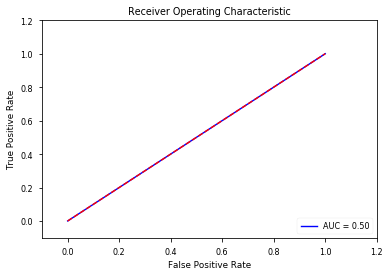

In [116]:
# ROC plot
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Upsampling & Downsampling for imbalanced data
1. Collect More Data (if possible)
2. Resampling the Dataset
    - oversampling
        - no information loss, perform better than undersampling
        - overfitting issues (because of duplicates)
    - undersampling
        - help improve run time and storage problems
        - information loss, biased dataset
3. Generate Synthetic Samples

In [117]:
# orginal dataset
df5.group.value_counts()

0    148976
1      5113
Name: group, dtype: int64

In [118]:
df5.group.value_counts().transform(lambda x: x / x.sum())

0    0.9668
1    0.0332
Name: group, dtype: float64

In [119]:
def oversampling(df):    

    df_pay_only = df.query("group == 1")
    df_pay_only_over = pd.concat([df_pay_only, df_pay_only, df_pay_only], axis=0) 
    df_over = pd.concat([df, df_pay_only_over], axis=0)

    return df_over

In [120]:
df5_over = oversampling(df5)

In [121]:
df5_over.group.value_counts().transform(lambda x: x / x.sum())

0    0.8793
1    0.1207
Name: group, dtype: float64

In [122]:
X = df5_over.drop("group", axis=1)
y = df5_over.group

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [123]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(127071, 11)
(127071,)
(42357, 11)
(42357,)


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# set params
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# fit
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'penalty': 'l1', 'C': 100}
0.9193993908917062
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [126]:
print(grid_search.score(X_test_scaled, y_test))

0.9208159218074935


In [127]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(grid_search.predict(X_test_scaled), y_test))

[[36469  2545]
 [  809  2534]]


In [128]:
from sklearn.metrics import classification_report

print(classification_report(grid_search.predict(X_test_scaled), y_test))

             precision    recall  f1-score   support

          0       0.98      0.93      0.96     39014
          1       0.50      0.76      0.60      3343

avg / total       0.94      0.92      0.93     42357



Text(0.5,0,'False Positive Rate')

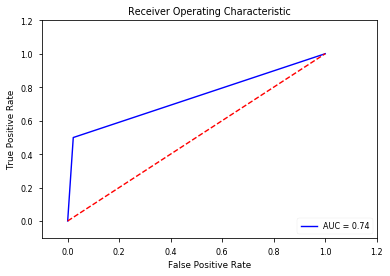

In [129]:
# ROC plot
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test_scaled))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### The model performance of the first application
- process
    - oversampling
    - dataset split
    - minmax scale
    - logistic regression, grid search, k-fold(5)
    - evaluation
    - Baseline score: **Precision: 0.5, Recall: 0.76, AUC: 0.74**
- How to improve
    - **There seems no overfitting issues**
        - how to avoid overfitting: collect more data
            - regularization
            - feature deduction
            - collect more samples
    - **Feature Engineering**
        - Other Scaling and Transformation
        - Feature selection or creation
            - Polynomial / Interactions
            - new features
        - Transformation
            - log, exp, sqrt (if not tree-based model)
            - Numeric to Categorical
    - **Model, Parameter Tuning**
        - KNN
        - NB
        - SVM
        - RF
        - NN .. any classification models


### How to Improve
- scale
- distribution transformation
- apply other models

### Change Scale to z-score & pipeline

In [130]:
df5_over.head() # after removes outliers

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.5048e+06,0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,1.7123e+07,0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.2344e+06,0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.1248e+05,0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4.3077e+06,0


In [131]:
X_train.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic
iduser,,,,,,,,,,,
10100008873531,17.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,5.7283e+07
10100002534050,28.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,14.0,0.0,2.4223e+07
10100036517560,36.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,10.0,2.0,4.5425e+07
10100013746186,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,5.0312e+04
10100000598189,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0000e+00


In [132]:
y_train.head()

iduser
10100008873531    1
10100002534050    1
10100036517560    0
10100013746186    0
10100000598189    0
Name: group, dtype: int64

In [133]:
from sklearn.pipeline import Pipeline

def pipeline_logit(X_train, y_train):

    scaler = StandardScaler()
    logit_model = LogisticRegression()

    pipe = Pipeline([('scaler', scaler), ('model', logit_model)])

    param_grid = [{'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'model__penalty': ['l1', 'l2']}]

    grid_search = GridSearchCV(pipe, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [134]:
grid_search = pipeline_logit(X_train, y_train)

In [135]:
print("best score: ", grid_search.best_score_)
print("best score: ", grid_search.best_params_)

('best score: ', 0.9193993908917062)
('best score: ', {'model__C': 1, 'model__penalty': 'l1'})


In [136]:
print(classification_report(grid_search.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96     39001
          1       0.50      0.76      0.60      3356

avg / total       0.94      0.92      0.93     42357



In [137]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)

print(roc_auc)

0.7397755729868845


### Transfrom Distribution

In [138]:
df5_over.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
count,169428.0000,169428.0000,169428.0000,169428.0000,169428.0000,169428.0000,169428.0000,169428.0000,169428.0000,169428.0000,1.6943e+05,169428.0000
mean,20.5642,0.8513,0.0385,0.6130,8.4348,0.0077,0.0254,0.0785,10.2052,1.4551,1.6754e+07,0.1207
std,21.1871,4.0678,0.1924,2.7108,16.6001,0.1045,0.6840,0.3578,6.7358,4.9307,3.6109e+07,0.3258
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000e+00,0.0000
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,0.0000,5.4815e+05,0.0000
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,4.0612e+06,0.0000
75%,27.0000,0.0000,0.0000,0.0000,13.0000,0.0000,0.0000,0.0000,14.0000,0.0000,1.6218e+07,0.0000
max,135.0000,60.0000,1.0000,27.0000,336.0000,2.0000,115.0000,6.0000,30.0000,52.0000,4.2634e+08,1.0000


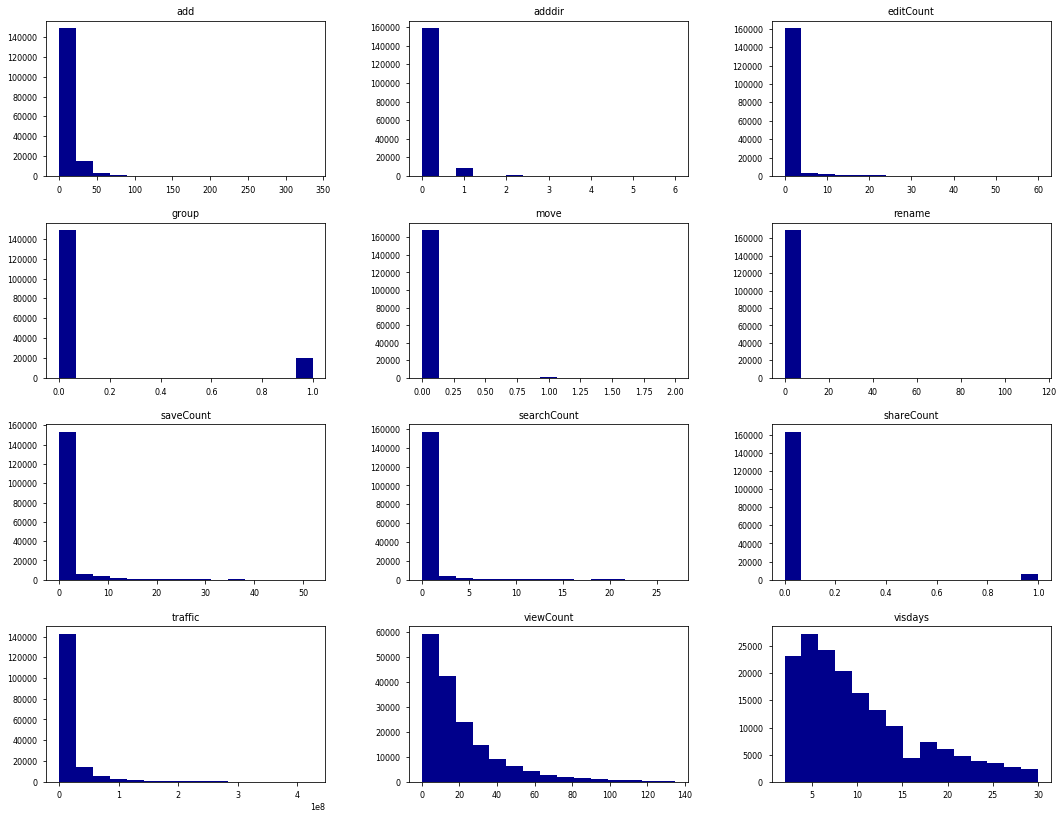

In [139]:
df5_over.hist(bins=15, color='darkblue', figsize=(18,14), grid=False);

In [140]:
df5_over_log = df5_over.loc[:,:'traffic'].apply(lambda x: np.log(x + 1)).join(df5_over['group'])

In [141]:
df5_over_log.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
count,230784.0000,230784.0000,230784.0000,230784.0000,230784.0000,230784.0000,230784.0000,230784.0000,230784.0000,230784.0000,230784.0000,230784.0000
mean,2.6496,0.3324,0.0359,0.3608,1.0529,0.0079,0.0174,0.0544,2.3944,0.5431,13.9681,0.3545
std,0.9317,0.8004,0.1537,0.7840,1.4823,0.0818,0.1525,0.2171,0.6433,0.9336,4.6036,0.4784
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0986,0.0000,0.0000,0.0000
25%,1.9459,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.9459,0.0000,13.2674,0.0000
50%,2.6391,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.3979,0.0000,15.2148,0.0000
75%,3.3322,0.0000,0.0000,0.0000,2.6391,0.0000,0.0000,0.0000,2.9444,0.6931,16.6060,1.0000
max,4.9127,4.1109,0.6931,3.3322,5.8201,1.0986,4.7536,1.9459,3.4340,3.9703,19.8707,1.0000


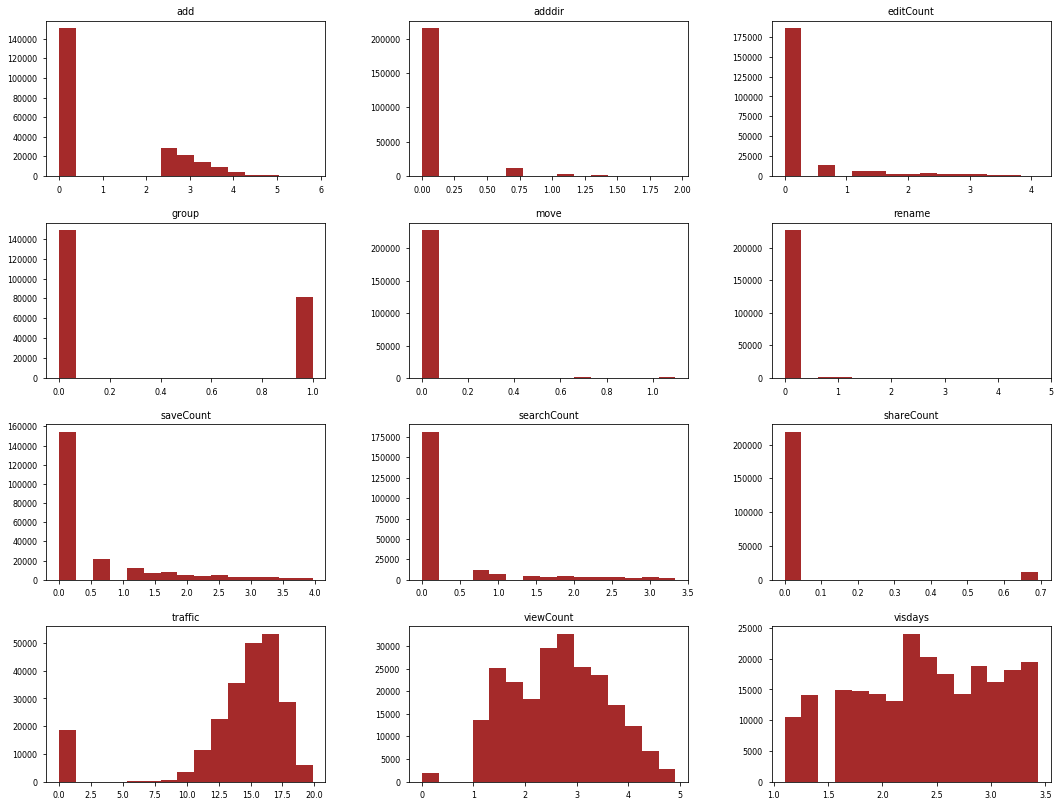

In [142]:
df5_over_log.hist(bins=15, color='brown', figsize=(18,14), grid=False);

In [143]:
X = df5_over_log.drop("group", axis=1)
y = df5_over_log.group

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [144]:
grid_search = pipeline_logit(X_train, y_train)

In [145]:
def evaluation(grid, X_test, y_test):
    
    print(classification_report(grid.predict(X_test), y_test))

    print("best score: ", grid.best_score_)
    print("best params: ", grid.best_params_)

    fpr, tpr, thresholds = roc_curve(y_test, grid.predict(X_test))
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [146]:
evaluation(grid_search, X_test, y_test)

             precision    recall  f1-score   support

          0       0.94      0.88      0.91     39879
          1       0.77      0.88      0.83     17817

avg / total       0.89      0.88      0.89     57696

('best score: ', 0.8856708726197079)
('best params: ', {'model__C': 0.01, 'model__penalty': 'l1'})


0.8590521282995897

Text(0.5,0,'False Positive Rate')

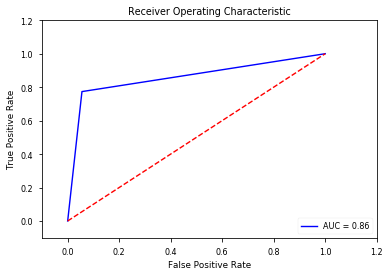

In [147]:
# ROC plot
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### The current score: **Precision: 0.77, Recall: 0.88, AUC: 0.86**

### [Feature Selection](https://machinelearningmastery.com/feature-selection-machine-learning-python/)
 - Efficiency
 - [Multicollinearity](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1)
 - How to select
    - Univariate Selection: T-test, ANOVA, Coefficient 
    - Feature Importance (Tree-based model)
    - RFE

In [148]:
print(len(X_train.columns))
print(len(X_test.columns))

11
11


### Univariate Selection
- [F value](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
- 그룹내 분산이 작고, 그룹간 분산이 클 경우 F value가 커짐 (F value가 크다는 의미는 그룹간 통계적 차이가 크다는 것을 의미)

In [149]:
from sklearn.feature_selection import SelectKBest, f_classif

def pipeline_logit_kbest(X_train, y_train):

    select = SelectKBest(score_func=f_classif) # if regression problem, score_func=f_regression

    scaler = StandardScaler()
    logit_model = LogisticRegression()

    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', logit_model)])

    param_grid = [{'feature_selection__k': [3,5,7],
                  'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'model__penalty': ['l1', 'l2']
                  }]

    grid_search = GridSearchCV(pipe, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [150]:
grid_search_kbest = pipeline_logit_kbest(X_train, y_train)

In [151]:
evaluation(grid_search_kbest, X_test, y_test)

             precision    recall  f1-score   support

          0       0.93      0.84      0.88     41386
          1       0.67      0.84      0.74     16310

avg / total       0.86      0.84      0.84     57696

('best score: ', 0.841444814198558)
('best params: ', {'model__C': 0.001, 'feature_selection__k': 7, 'model__penalty': 'l1'})


0.7996079647801195

In [152]:
mask = grid_search_kbest.best_estimator_.named_steps['feature_selection'].get_support()
features_list = list(X_train.columns.values)

selected_features = []
for bool, features in zip(mask, features_list):
    if bool:
        selected_features.append(features)
        
print(selected_features)        

['editCount', 'shareCount', 'searchCount', 'rename', 'visdays', 'saveCount', 'traffic']


### Feature Importance of ExtraTreesClassifier

In [153]:
from sklearn.ensemble import ExtraTreesClassifier

def pipeline_tree_kbest(X_train, y_train):

    select = SelectKBest() # if regression problem, score_func=f_regression

#    scaler = StandardScaler()
    extra_tree_model = ExtraTreesClassifier()

    pipe = Pipeline([('feature_selection', select), ('model', extra_tree_model)])

    param_grid = [{'feature_selection__k': [5,7],
                   'model__max_depth': [4, 6], # max_depth: The maximum depth of the tree.
                   'model__n_estimators': [10, 50], # n_estimators: The number of trees in the forest.
                   'model__min_samples_split': [50, 100]}]

    grid_search = GridSearchCV(pipe, param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [154]:
grid_search_tree = pipeline_tree_kbest(X_train, y_train)

In [155]:
evaluation(grid_search_tree, X_test, y_test)

             precision    recall  f1-score   support

          0       0.93      0.83      0.88     41873
          1       0.66      0.84      0.74     15823

avg / total       0.86      0.84      0.84     57696

('best score: ', 0.8464884914032169)
('best params: ', {'feature_selection__k': 5, 'model__max_depth': 6, 'model__min_samples_split': 50, 'model__n_estimators': 50})


0.794933338222801

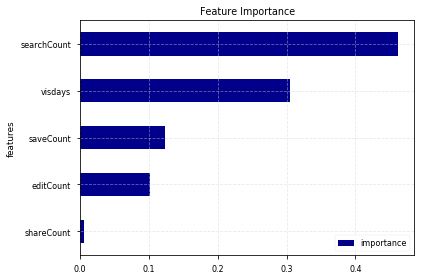

In [156]:
mask = grid_search_tree.best_estimator_.named_steps['feature_selection'].get_support()
feature_importance = grid_search_tree.best_estimator_.named_steps['model'].feature_importances_

features_list = list(X_train.columns.values)

selected_features = []
for bool, features in zip(mask, features_list):
    if bool:
        selected_features.append(features)

# create a df        
feature_importance_pd = pd.DataFrame(list(zip(selected_features, feature_importance)),\
                                    columns=['features', 'importance'])\
                          .set_index("features").sort_values("importance")

# visiual
feature_importance_pd.plot(kind='barh', color='darkblue')

plt.title("Feature Importance")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### Q)  RFE (recursive feature elimination)
- Backward 방식중 하나로 모든 변수를 다 포함시키고 반복해서 학습을 하면서 중요하지 않은 변수를 하나씩 제거하는 방식
    - [API DOC](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)
- 위 방식을 이용해서 원하는 모델을 이용해 Feature Selection(elimination)을 해보세요. 

In [157]:
## RFE (Recursive Feature Elimination)
# short ver.
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

svm = LinearSVC()
rfe = RFE(svm, 1)
rfe = rfe.fit(X_train, y_train)

print(X.columns.tolist())
print(rfe.support_)
print(rfe.ranking_)

['viewCount', 'editCount', 'shareCount', 'searchCount', 'add', 'move', 'rename', 'adddir', 'visdays', 'saveCount', 'traffic']
[False False False False False False False False  True False False]
[ 6  8  4  2 10  3  5  9  1  7 11]


In [158]:
# pipeline ver.
def pipeline_lm_rfe(X_train, y_train):

    scaler = StandardScaler()
    lm = LogisticRegression()
    select = RFE(lm, 1) 
    
    pipe = Pipeline([('feature_selection', select), ('scaler', scaler), ('model', lm)])

    param_grid = [{'model__C': [0.01, 1], 
                  'model__penalty': ['l1', 'l2']
                  }]

    grid_search = GridSearchCV(pipe, param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [159]:
grid_search_rfe = pipeline_lm_rfe(X_train, y_train)

In [160]:
evaluation(grid_search_rfe, X_test, y_test)

             precision    recall  f1-score   support

          0       0.85      0.80      0.83     39562
          1       0.62      0.69      0.65     18134

avg / total       0.78      0.77      0.77     57696

('best score: ', 0.7702671473470142)
('best params: ', {'model__C': 0.001, 'model__penalty': 'l1'})


0.734118603380132

In [161]:
print(X_train.columns.tolist())
print(grid_search_rfe.best_estimator_.named_steps['feature_selection'].support_)
print(grid_search_rfe.best_estimator_.named_steps['feature_selection'].ranking_)

['viewCount', 'editCount', 'shareCount', 'searchCount', 'add', 'move', 'rename', 'adddir', 'visdays', 'saveCount', 'traffic']
[False False False False False False False False  True False False]
[ 6 10  4  2  9  3  5  8  1  7 11]


### Q) Random Forest, SVM이나 NB, Neural Network 등 다른 모델도 파이프라인에 사용해보세요.
```python
# KNN
from sklearn.neighbors import KNeighborsClassifier

params_grid = [{'n_neighbors': [3, 5, 10], # default: 5
                'metric': ['euclidean', 'manhattan']
                # cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’
               }]

# SVC
from sklearn.svm import SVC

params_grid = [{'C': [1, 10], # Penalty parameter C of the error term
                'gamma': [1, 10] # Higher the value of gamma, will try to exact fit
                'kernel': ['linear', 'rbf']
               }]

# neural_network
from sklearn.neural_network import MLPClassifier

params_grid = [{'solver': [1, 10],
                'hidden_layer_sizes': [(5,2), (3,3)]
               }]

```

In [164]:
from sklearn.neural_network import MLPClassifier

def pipeline_nn(X_train, y_train):

    select = SelectKBest(score_func=f_classif) # if regression problem, score_func=f_regression
    scaler = MinMaxScaler()
    mlp = MLPClassifier()

    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', mlp)])

    param_grid = [{'feature_selection__k': [5,7],
                  'model__solver': ['sgd', 'adam'],
                  'model__hidden_layer_sizes': [(5,2), (3,3)]
                  }]

    grid_search = GridSearchCV(pipe, param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [165]:
grid_search_nn = pipeline_nn(X_train, y_train)

In [166]:
evaluation(grid_search_nn, X_test, y_test)

             precision    recall  f1-score   support

          0       0.92      0.87      0.89     39168
          1       0.76      0.83      0.79     18528

avg / total       0.87      0.86      0.86     57696

('best score: ', 0.8605911443889813)
('best params: ', {'model__hidden_layer_sizes': (3, 3), 'feature_selection__k': 7, 'model__solver': 'adam'})


0.8370449122468682